# DATA AUGMENTATION

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2
import pickle
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

**LOADING AND PRE-PROCESSING DATASET**

In [0]:
imagesize = 256
seed =6

In [4]:
pkl_img = open('Image.pickle','rb')
Final_image_data = pickle.load(pkl_img)

pkl_img = open('Mask.pickle','rb')
Final_mask_data = pickle.load(pkl_img)

print(f'Shape of training images: {Final_image_data.shape}')
print(f'Shape of training mask: {Final_mask_data.shape}')

Shape of training images: (3929, 256, 256, 1)
Shape of training mask: (3929, 256, 256, 1)


In [7]:

Final_image_data = Final_image_data/255.0
Final_mask_data = Final_mask_data/255.0

# Splitting The dataset

Training_images,Validation_images,Training_mask,Validation_masks = train_test_split(Final_image_data,Final_mask_data,test_size=0.15,random_state=42)
del(Final_image_data)
del(Final_mask_data)
Validation_images,Test_images,Validation_masks,Test_masks = train_test_split(Validation_images,Validation_masks,test_size=0.15,random_state=42)


print(f'Training Images shape:{Training_images.shape}')
print(f'Training Mask shape:{Training_mask.shape}')
print(f'Validation Images shape:{Validation_images.shape}')
print(f'Validation Mask shape:{Validation_masks.shape}')
print(f'Test Images shape:{Test_images.shape}')
print(f'Test Mask shape:{Test_masks.shape}')

Training Images shape:(3339, 256, 256, 1)
Training Mask shape:(3339, 256, 256, 1)
Validation Images shape:(501, 256, 256, 1)
Validation Mask shape:(501, 256, 256, 1)
Test Images shape:(89, 256, 256, 1)
Test Mask shape:(89, 256, 256, 1)


**IMAGE ROTATION**

In [0]:
imagegen = ImageDataGenerator(rotation_range=45)
maskgen = ImageDataGenerator(rotation_range=45)

image_generator_rot = imagegen.flow(Training_images,seed=seed,batch_size=1)
mask_generator_rot = maskgen.flow(Training_mask,seed=seed,batch_size=1)

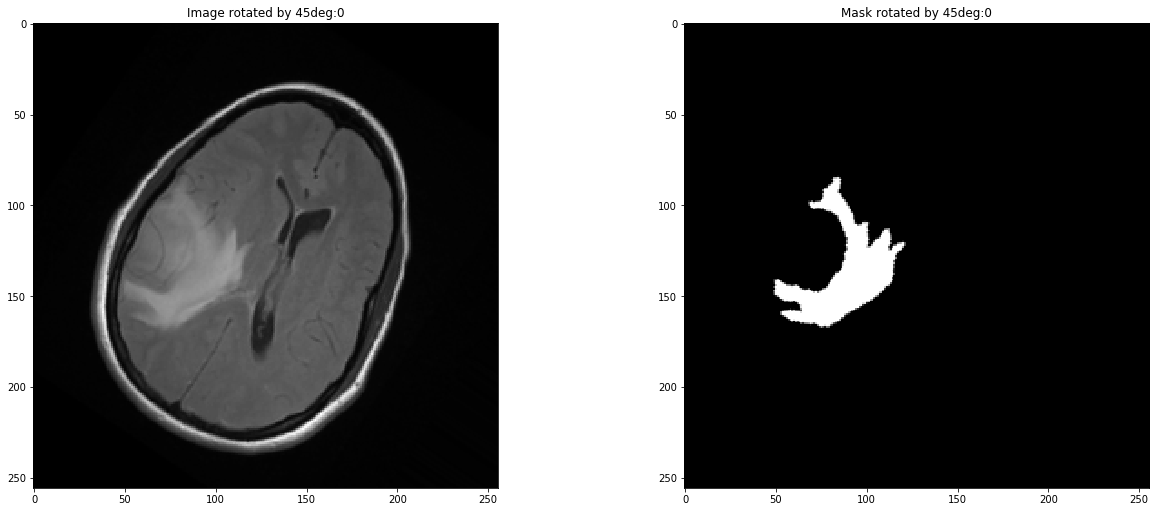

In [11]:
for i in range(1):
  fig = plt.figure(figsize=(20,15))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  ax = fig.add_subplot(1,2,1)
  plt.title(f'Image rotated by 45deg:{i}')
  ax.imshow(np.reshape((image_generator_rot[1])[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,2,2)
  plt.title(f'Mask rotated by 45deg:{i}')
  ax.imshow(np.reshape((mask_generator_rot[1])[i]*255, (imagesize,imagesize)), cmap="gray")

**IMAGE WIDTH SHIFT**

In [0]:
imagegen_width = ImageDataGenerator(width_shift_range=0.1)
maskgen_width = ImageDataGenerator(width_shift_range=0.1)

image_generator_width = imagegen_width.flow(Training_images,seed=seed,batch_size=1)
mask_generator_width = maskgen_width.flow(Training_mask,seed=seed,batch_size=1)

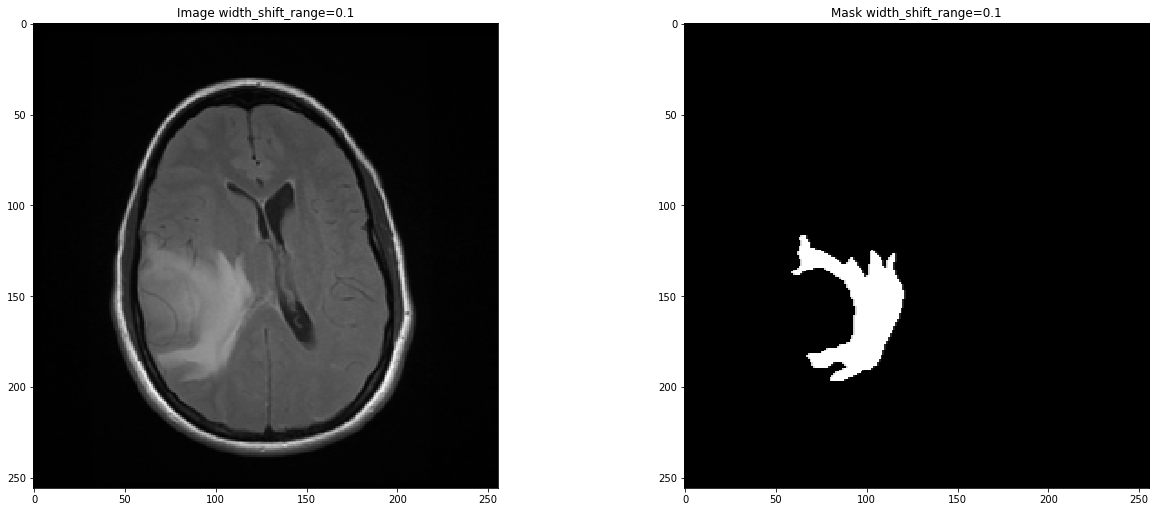

In [13]:
for i in range(1):
  fig = plt.figure(figsize=(20,15))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  ax = fig.add_subplot(1,2,1)
  plt.title(f'Image width_shift_range=0.1')
  ax.imshow(np.reshape((image_generator_width[1])[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,2,2)
  plt.title(f'Mask width_shift_range=0.1')
  ax.imshow(np.reshape((mask_generator_width[1])[i]*255, (imagesize,imagesize)), cmap="gray")

**IMAGE HEIGHT SHIFT**

In [0]:
imagegen_height = ImageDataGenerator(height_shift_range=0.1)
maskgen_height = ImageDataGenerator(height_shift_range=0.1)

image_generator_height = imagegen_height.flow(Training_images,seed=seed,batch_size=1)
mask_generator_height = maskgen_height.flow(Training_mask,seed=seed,batch_size=1)

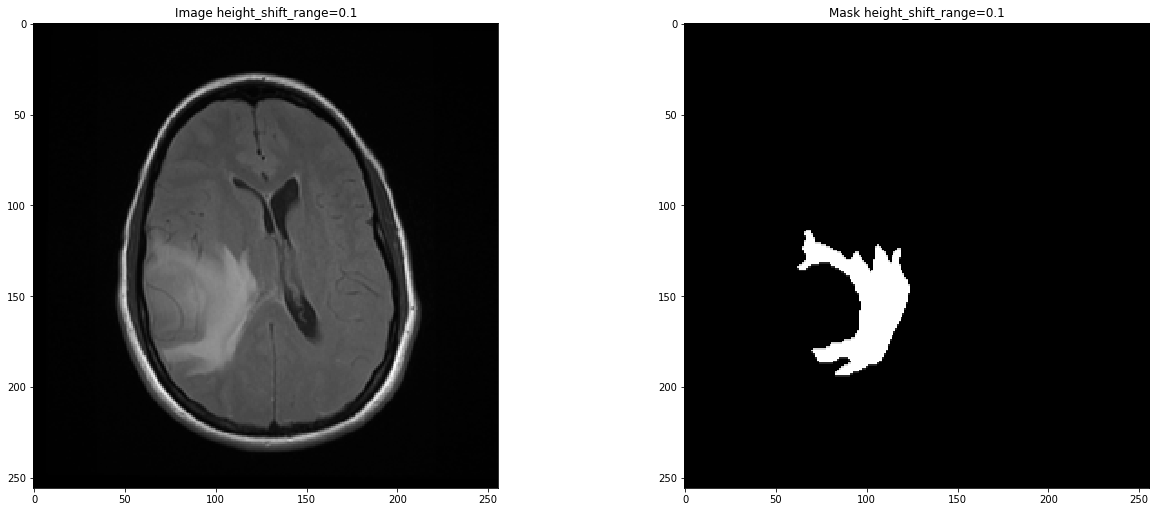

In [15]:
for i in range(1):
  fig = plt.figure(figsize=(20,15))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  ax = fig.add_subplot(1,2,1)
  plt.title(f'Image height_shift_range=0.1')
  ax.imshow(np.reshape((image_generator_height[1])[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,2,2)
  plt.title(f'Mask height_shift_range=0.1')
  ax.imshow(np.reshape((mask_generator_height[1])[i]*255, (imagesize,imagesize)), cmap="gray")

**IMAGE ZOOM**

In [0]:
imagegen_zoom = ImageDataGenerator(zoom_range=0.2)
maskgen_zoom = ImageDataGenerator(zoom_range=0.2)

image_generator_zoom = imagegen_zoom.flow(Training_images,seed=seed,batch_size=1)
mask_generator_zoom = maskgen_zoom.flow(Training_mask,seed=seed,batch_size=1)

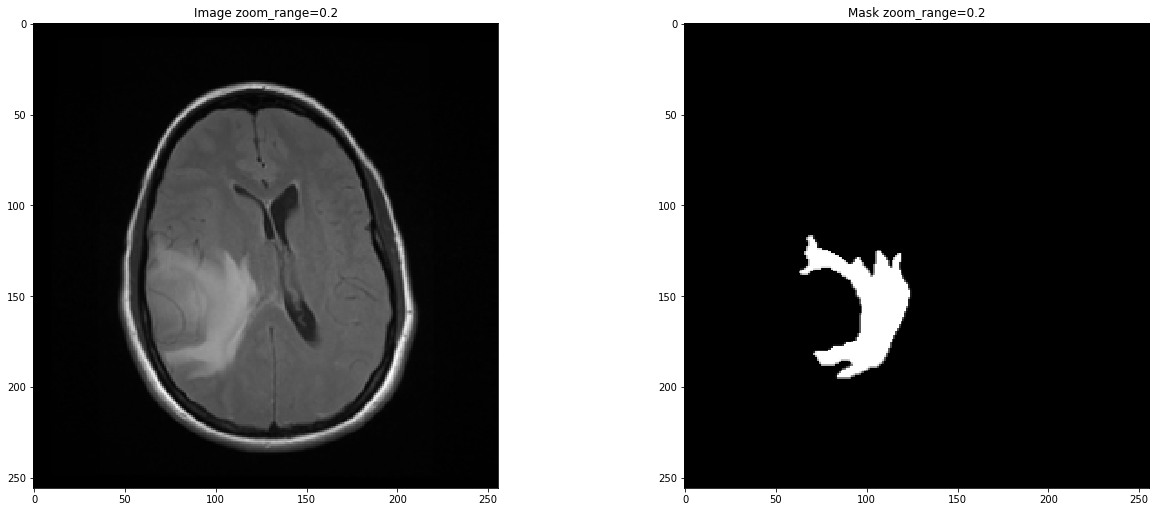

In [17]:
for i in range(1):
  fig = plt.figure(figsize=(20,15))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  ax = fig.add_subplot(1,2,1)
  plt.title(f'Image zoom_range=0.2')
  ax.imshow(np.reshape((image_generator_zoom[1])[i]*255, (imagesize,imagesize)), cmap="gray")

  ax = fig.add_subplot(1,2,2)
  plt.title(f'Mask zoom_range=0.2')
  ax.imshow(np.reshape((mask_generator_zoom[1])[i]*255, (imagesize,imagesize)), cmap="gray")